In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import pickle

%matplotlib inline

In [2]:
# Read data 
data = pd.read_csv('fraud_dataset_example.csv')

# Show number of rows and columns 
print(data.shape)

# get variable names
print(data.columns) 

(101613, 11)
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [3]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
# shape of the dataframe
data.shape

(101613, 11)

In [5]:
# variable names
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
# drop duplicates
data.drop_duplicates()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0


In [7]:
# Drop variables with missing values
data.dropna(axis = 'columns')
data.shape, data.columns

((101613, 11),
 Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
        'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
        'isFlaggedFraud'],
       dtype='object'))

In [8]:
# Selecting Variables
var = ['step','type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFraud']

data[var]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0


In [9]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [10]:
# Obtain summary statistics
data[var].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,101613.000000
mean,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06,0.001142
std,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06,0.033768
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04,0.000000
75%,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06,0.000000
max,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07,1.000000


<Axes: xlabel='isFraud', ylabel='Count'>

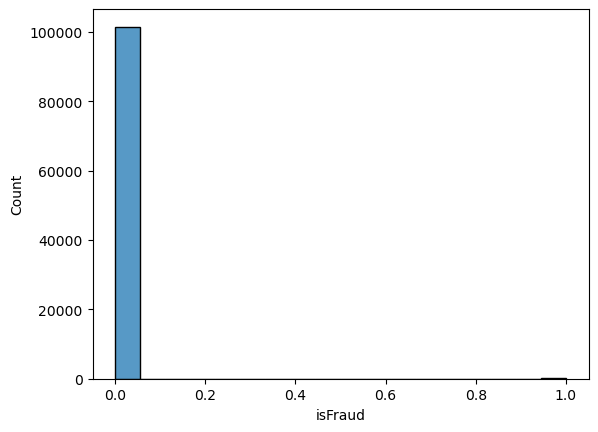

In [11]:
# Plot histogram 

sns.histplot(data = data, x = 'isFraud')

In [12]:
# Correlation matrix

my_data = data[var]
my_data.shape

my_data.corr()

C:\Users\91869\AppData\Local\Temp\ipykernel_19880\1740883430.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  my_data.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.076010,0.004918,0.004737,0.009535,0.011181,-0.051498
amount,0.076010,1.000000,-0.010663,-0.016614,0.244933,0.372792,0.036008
oldbalanceOrg,0.004918,-0.010663,1.000000,0.998963,0.103087,0.072234,-0.004235
newbalanceOrig,0.004737,-0.016614,0.998963,1.000000,0.104622,0.071242,-0.010546
oldbalanceDest,0.009535,0.244933,0.103087,0.104622,1.000000,0.938971,-0.009208
newbalanceDest,0.011181,0.372792,0.072234,0.071242,0.938971,1.000000,-0.006353
isFraud,-0.051498,0.036008,-0.004235,-0.010546,-0.009208,-0.006353,1.000000


C:\Users\91869\AppData\Local\Temp\ipykernel_19880\3014367580.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(my_data.corr(), annot = True)


<Axes: >

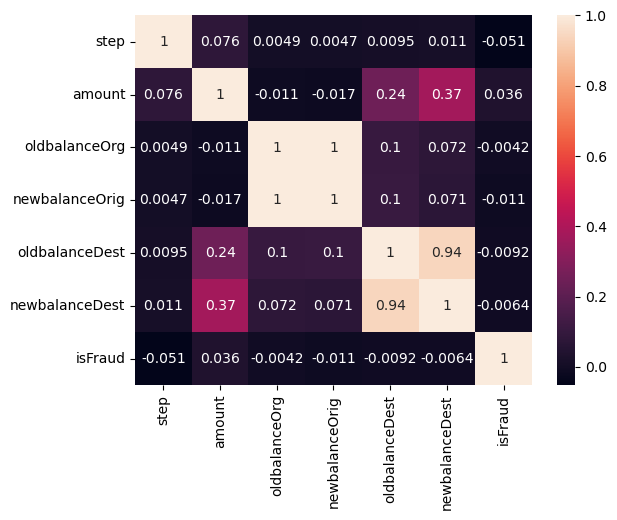

In [13]:
# heatmap
sns.heatmap(my_data.corr(), annot = True)

In [14]:
cols = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [15]:
X = data[cols]
Y = data['isFraud']

In [16]:
X = data.loc[:, ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']] 
Y = data.loc[:, ['isFraud']]

In [17]:
# Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=42,stratify=data['isFraud'])

In [18]:
#knn classifier

In [19]:
# Train a k-NN model with k = 4
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors =4)

knn.fit(X_train,y_train)
knn_model = knn.fit(X_train,y_train)

C:\Users\91869\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91869\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [20]:
# Use the testing data to predict if fraudulent or not
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
knn.score(X_test, y_test), knn.score(X_train, y_train)

(0.9990159030074004, 0.9990289860777598)

In [22]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
#Logistic Regression

In [24]:
# Compare the data distributions
print(np.mean(y_train), np.mean(Y))

isFraud    0.001142
dtype: float64 isFraud    0.001142
dtype: float64


C:\Users\91869\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\91869\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [25]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Coef are: ", logreg.coef_)

logistic_model = logreg.fit(X_train, y_train)

C:\Users\91869\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coef are:  [[-8.80288819e-01 -5.17790266e-05  6.47963295e-05 -1.08368971e-04
   1.08467600e-06 -1.82384395e-06]]


C:\Users\91869\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
#performance

In [27]:
from sklearn.metrics import confusion_matrix

my_matrix = confusion_matrix(y_test,y_pred)
my_matrix

array([[25375,     0],
       [   25,     4]], dtype=int64)

In [28]:
print("TP is:", my_matrix[1,1])
print("TN is:", my_matrix[0,0])
print("FP is:", my_matrix[0,1])
print("FN is:", my_matrix[1,0])

TP is: 4
TN is: 25375
FP is: 0
FN is: 25


In [29]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Precision score:', precision_score(y_test, y_pred) )
print('Recall score:', recall_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Precision score: 1.0
Recall score: 0.13793103448275862
Accuracy score: 0.9990159030074004
F1 score: 0.2424242424242424


Text(0.5, 1.0, 'precision-Recall Curve')

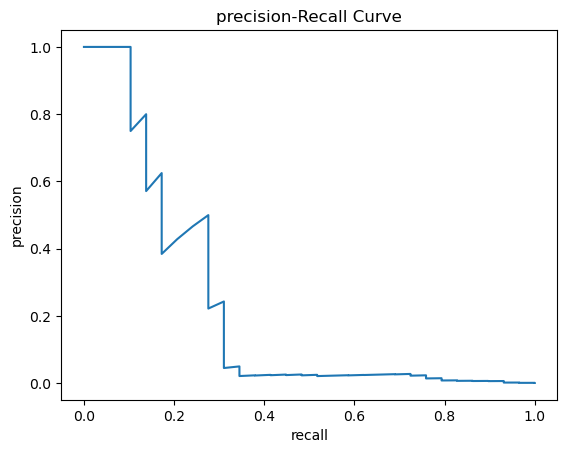

In [30]:
# Plot the Precision-Recall Curve

from sklearn.metrics import precision_recall_curve

# Get probability
log_reg_prob = logreg.predict_proba(X_test)[:, 1]

# Collect Necessary Measures
precision,  recall, threshold = precision_recall_curve(y_test, log_reg_prob)

# Plot Figure
plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("precision-Recall Curve")

In [31]:
from sklearn.metrics import roc_auc_score

print("AUC for logistic regression:",  roc_auc_score(y_test, log_reg_prob) )

AUC for logistic regression: 0.9236065907932733


Text(0.5, 1.0, 'ROC')

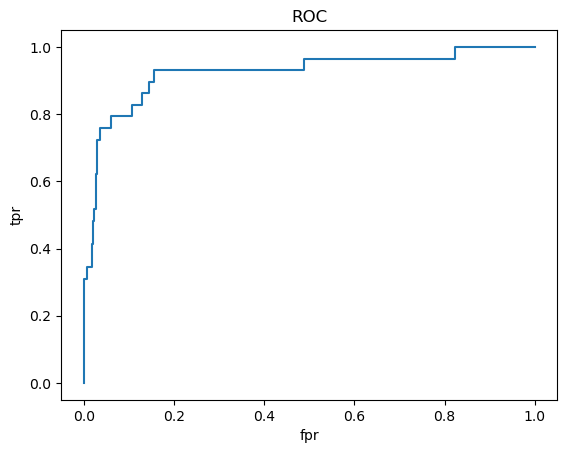

In [32]:
from sklearn.metrics import roc_curve

# Predicted Probability: y_pred_proba
# Get Measures

# Generate Figure
fpr, tpr, threshold =  roc_curve(y_test, log_reg_prob)

plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC")


In [33]:
#decision tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0, criterion='entropy')
dt.fit(X_train, y_train)
dt.score(X_test, y_test), dt.score(X_train, y_train)

(0.9991733585262164, 1.0)

In [35]:
# If 0 the feature was not used in the tree 

dt.feature_importances_

array([0.12599499, 0.30002124, 0.37951099, 0.09782998, 0.03730338,
       0.05933942])

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt_3 = DecisionTreeClassifier(random_state=0, max_depth=3, criterion='entropy')
dt_3.fit(X_train, y_train)
dt_3.score(X_test, y_test), dt_3.score(X_train, y_train)

(0.9988584474885844, 0.9988715243606399)

In [37]:
# GridSearch + CV
from sklearn.model_selection import GridSearchCV

opt_tree = DecisionTreeClassifier(random_state = 0)

dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11),
             'max_leaf_nodes':    range(2,11)   }

grid_tree = GridSearchCV(opt_tree, dt_params)
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [38]:
# Report the best hyperparameters chosen

grid_tree.best_params_

{'max_depth': 9, 'max_leaf_nodes': 10, 'min_samples_split': 8}

In [39]:
grid_tree.best_score_

0.9989633785779439

In [40]:
from sklearn import tree
print(tree.export_text(grid_tree.best_estimator_))

|--- feature_1 <= 5268849.50
|   |--- feature_0 <= 6.50
|   |   |--- feature_1 <= 2883844.62
|   |   |   |--- feature_3 <= 2.91
|   |   |   |   |--- feature_2 <= 168131.37
|   |   |   |   |   |--- feature_2 <= 10104.23
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  10104.23
|   |   |   |   |   |   |--- feature_1 <= 10848.76
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  10848.76
|   |   |   |   |   |   |   |--- feature_1 <= 26815.64
|   |   |   |   |   |   |   |   |--- feature_2 <= 21838.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_2 >  21838.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_1 >  26815.64
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  168131.37
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  2.91
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  2883844.6

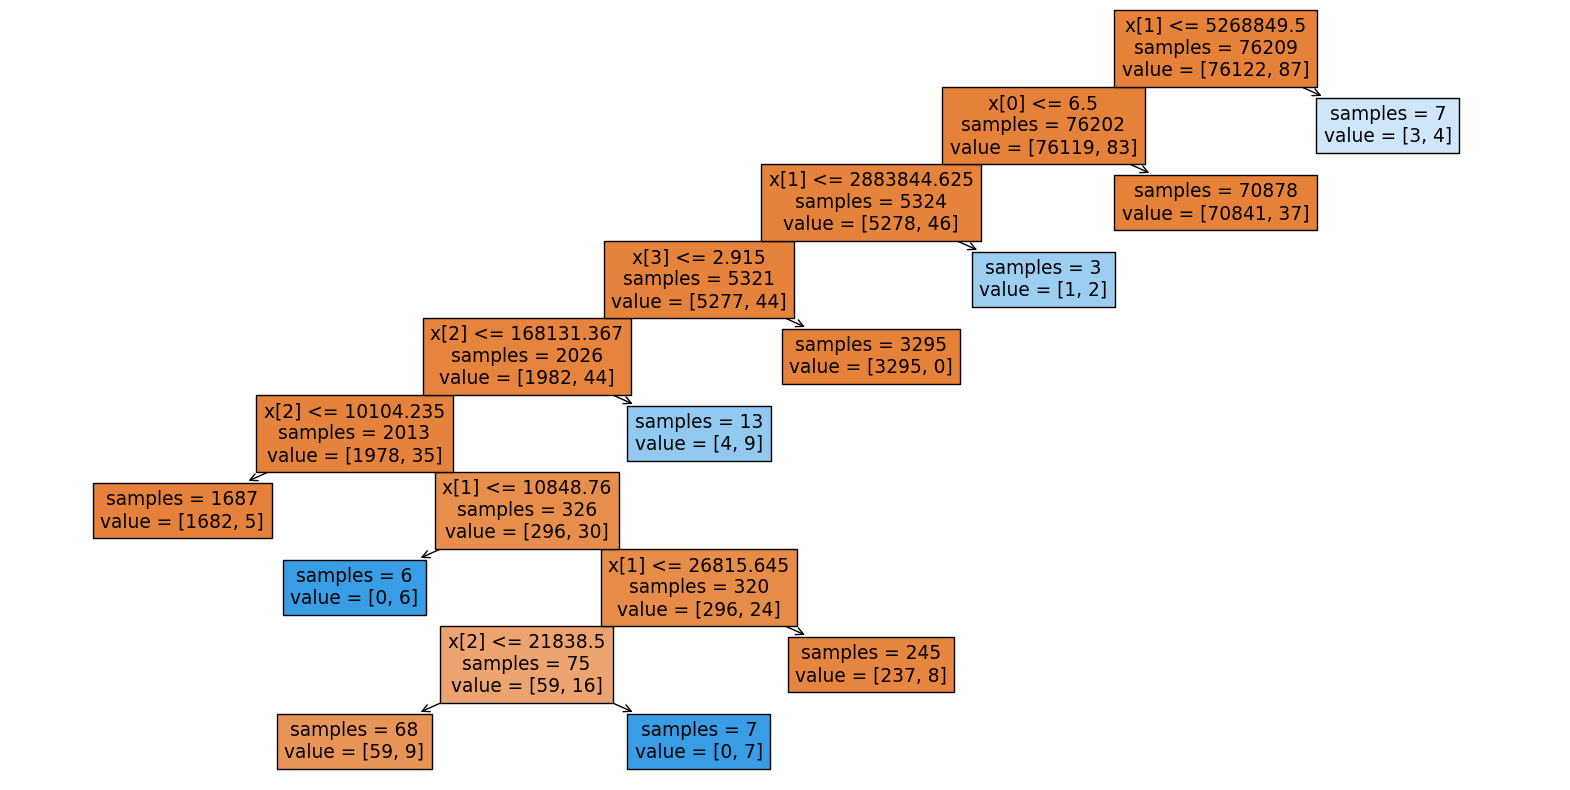

In [41]:
# Plot the decision tree
from sklearn import tree
fig = plt.figure(figsize=(20,10)) # set a proper figure size (in case that the figure is too small to read or ratio is not proper)

tree.plot_tree(grid_tree.best_estimator_, 
               #feature_names = X
               #class_names = Y, # specify class (Y) names
               filled = True, impurity = False) # whether to color the boxes, whether to report gini index
             #   fontsize = 12) # set fontsize to read
plt.show()
